# Introducción a SymPy

SymPy es una librería desarrollada para python que permite el manejo de variables simbólicas. 

## Importar librerias auxiliares

In [1]:
#
# Utiliar librerias vistas en clase
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

#para imprimir de una forma pebella
# sys.init_printing()
from sympy import init_printing as sprint

END_BLOCK = "=========================="

## 1.- Creación de variables simbólicas

La función **symbols** de sympy abre la posibilidad de trabajar con variables simbólicas dentro del ambiente de python, y facilitar su operacion con una gran variedad de herramientas y librerias. 

In [2]:
#creamos variables simbólicas
x,z = sym.symbols('x, z', real=True)

# Crear la funcion matematica
y = x**3 + 2*x**2 + 4*x + 8
g = x*sym.exp(z)/(x+1)

print(f"La expresión 1 es: \n{y}")
print(f"La expresión 2 es: \n{g}")
print(END_BLOCK)

#Evaluamos la expresión
print(f"El valor de y(1) es \n{y.subs(x,11)}")
print(f"El valor de y(2) es \n{g.evalf(subs={x:2,z:27})}")
print(END_BLOCK)

#Para cambiar o sustituir vairables
y = y.subs(x, y+z)
print(f"Le nueva forma de y(z) es: \n{y}")



La expresión 1 es: 
x**3 + 2*x**2 + 4*x + 8
La expresión 2 es: 
x*exp(z)/(x + 1)
El valor de y(1) es 
1625
El valor de y(2) es 
354698827067.866
Le nueva forma de y(z) es: 
4*x**3 + 8*x**2 + 16*x + 4*z + (x**3 + 2*x**2 + 4*x + z + 8)**3 + 2*(x**3 + 2*x**2 + 4*x + z + 8)**2 + 40


La evaluación de la función cos es: 
 [ 1.          0.99551728  0.98210932  0.95989632  0.92907743  0.88992896
  0.84280189  0.78811873  0.72636975  0.65810855  0.58394711  0.50455034
  0.42063005  0.33293864  0.24226228  0.14941394  0.05522603 -0.039457
 -0.13378628 -0.22691611 -0.31801154 -0.40625585 -0.49085791 -0.57105921
 -0.64614071 -0.71542929 -0.77830373 -0.83420034 -0.88261798 -0.92312256
 -0.95535095 -0.97901421 -0.99390017 -0.99987539 -0.99688629 -0.98495967
 -0.96420246 -0.93480076 -0.89701816 -0.8511934  -0.79773733 -0.73712919
 -0.66991237 -0.59668949 -0.51811703 -0.43489943 -0.34778276 -0.25754807
 -0.16500435 -0.0709813   0.02367813  0.11812528  0.21151339  0.30300518
  0.3917804   0.47704314  0.55802898  0.63401185  0.70431053  0.76829475
  0.82539088  0.87508702  0.91693763  0.95056749  0.9756751   0.99203536
  0.99950159  0.99800685  0.98756455  0.96826831  0.94029111  0.9038838
  0.85937278  0.8071571   0.74770492  0.68154923  0.60928316  0.53155459
  0.44906041  0.

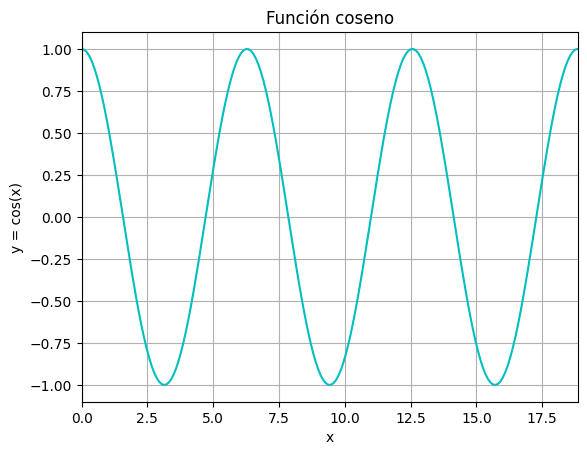

In [3]:
#creamos la funcion 
p = sym.cos(x)

#Evaluamos la expresión
q = sym.lambdify(x,p, 'numpy') #paso de sumbolica a evaluable
x0 = np.linspace(0,6*np.pi,200)
sol=q(x0)
print("La evaluación de la función cos es: \n", sol)

#Graficamos
plt.figure()
plt.title("Función coseno")
plt.plot(x0,sol, 'c')
plt.xlabel("x")
plt.ylabel("y = cos(x)")
plt.xlim([0,6*np.pi])
plt.grid()
plt.show()


## 2.- Transformada de Laplace

Sympy provee utilidades para realizar operaciones con la transformada de Laplace, por medio de la función **laplace_transform** y **inverse_laplace_transform**.

In [4]:
#Creamos las variables simbólicas
t,s = sym.symbols('t,s', real=True)

#Creamos función
f = 5 * sym.exp(-x*t) + 2*sym.exp(-x*t)

#pasamos a la place
f_L = sym.laplace_transform(f, t, s, noconds=True)
print(f"F(s) = {f_L}")
print(END_BLOCK)
print(f"Hola a todos \n{sym.pretty(f_L)}")

#Para obtener la transformada inversa de laplace de la expresión
F = sym.inverse_laplace_transform(f_L, s,t, noconds=True)

print(END_BLOCK)
print(f"f(t) = {F}")
print(END_BLOCK)
print(f"{sym.pretty(F)}")
print(END_BLOCK)



F(s) = 7/(s + x)
Hola a todos 
  7  
─────
s + x
f(t) = 7*exp(-t*x)*Heaviside(t)
   -t⋅x     
7⋅ℯ    ⋅θ(t)


Por medio del método **subs** es posible evaluar expresiones puntualmente, así como la función **plot** permite evaluar la respuesta de un sistema en un intérvalo determinado de tiempo. 

El resultado de la evaluación es 7/2


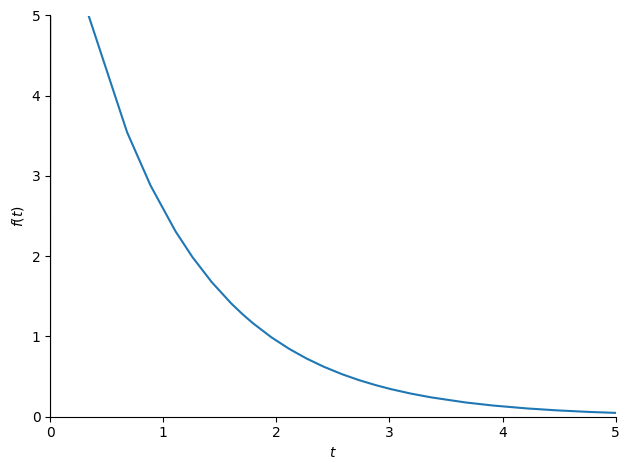

In [14]:
#Evaluamos la expresión
e = f_L.subs({x:1,s:1})
print(f"El resultado de la evaluación es {e}")
print(END_BLOCK)

#Para graficar variables imbolicas es sym.plot


p = sym.plot( F.subs({x:1}), xlim=(0,5), ylim=(0,5), show=True)

Los objetos creados con simpy tienen algunos métodos interesantes, como al posiblidad de descomponer una expresión en fracciones parciales.

In [24]:
# Representar un sistema en fracciones parciales

F1 = (s+1) * (s+5) * (s+12) / ( (s+4) * (s+9) * (s+1) )
print(sym.pretty(F1))
Fp = F1.apart(s)
print(sym.pretty(Fp))
print(END_BLOCK)

finv = sym.inverse_laplace_transform(Fp,s,t,noconds=True)
print(sym.pretty(finv))
print(END_BLOCK)

(s + 5)⋅(s + 12)
────────────────
(s + 4)⋅(s + 9) 
        12          8    
1 + ───────── + ─────────
    5⋅(s + 9)   5⋅(s + 4)
          -4⋅t            -9⋅t     
       8⋅ℯ    ⋅θ(t)   12⋅ℯ    ⋅θ(t)
δ(t) + ──────────── + ─────────────
            5               5      
